In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from utility import *

In [2]:
start = '09-10-2014'
end = '01-12-2023'
n = 80
group_b = 0.15
y_base_a = 40
y_base_b = 80
employment_real = y_base_a * (1 - group_b) + y_base_b * group_b
times = pd.period_range(start=start, end=end, freq='M').strftime('%m-%Y')
t = len(times)

d_sample = dict(color='#00B0F0', linestyle=':')
d_4_8_4 = dict(color='#0070C0', linestyle='dashed')
d_real = dict(color='r', linestyle='--')
d_mean = dict(color='b', linestyle='-')
d_group_a = dict(color='green', linestyle='-')
d_group_b = dict(color='b', linestyle='-')

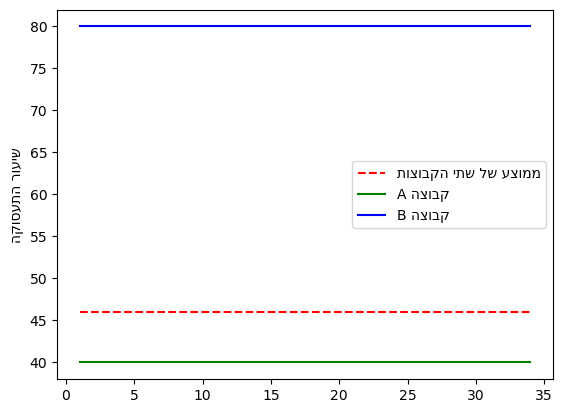

In [3]:
x = range(1, 35)
y_a = np.array([y_base_a] * len(x))
y_b = np.array([y_base_b] * len(x))
y_real = y_a * (1 - group_b) + y_b * group_b
fig, ax = plt.subplots()
ax.plot(x, y_real, **d_real, label=get_display("ממוצע של שתי הקבוצות"))
ax.plot(x, y_a, **d_group_a, label=get_display("קבוצה A"))
ax.plot(x, y_b, **d_group_b, label=get_display("קבוצה B"))
plt.legend(loc='best')
ax.set_ylabel(get_display("שיעור התעסוקה"))
plt.show()

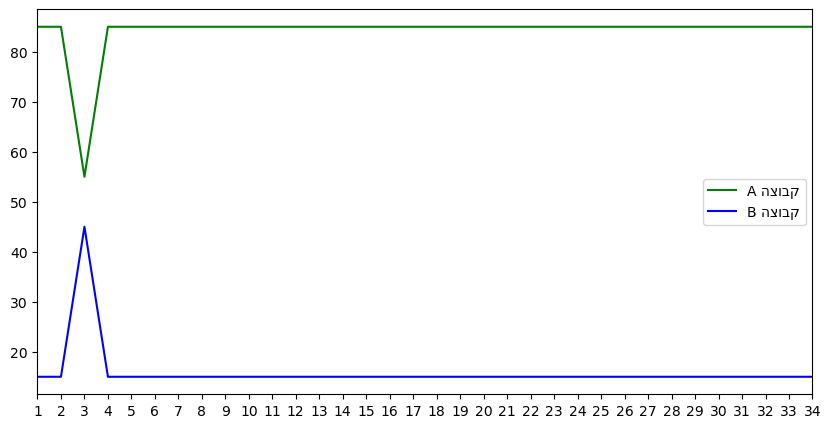

In [4]:
x = range(-25, 84)
group_b_rates = pd.Series([group_b] * (len(x)))
group_b_rates[28] = 0.45
group_b_rates[64] = 0.45
group_a_rates = 1 - group_b_rates

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, group_a_rates * 100, **d_group_a, label=get_display("קבוצה A"))
ax.plot(x, group_b_rates * 100, **d_group_b, label=get_display("קבוצה B"))
ax.set_xticks(x)
ax.set_xlim(1, 34)
plt.legend(loc='best')
ax.set_ylabel(get_display(""))
plt.show()

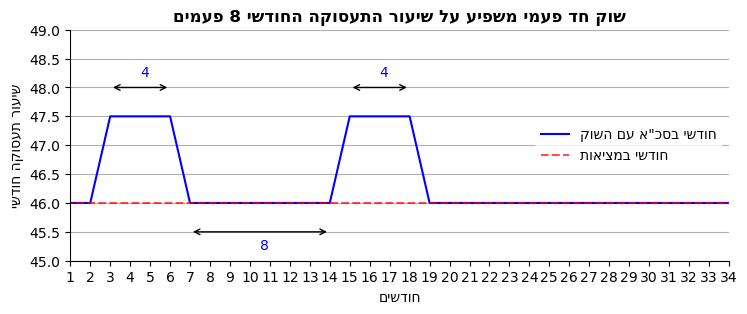

In [5]:
x = range(-10, 84)
y_mean = mean_4_8_4(y_base_a * (1 - group_b_rates) + y_base_b * group_b_rates).dropna()
y_real = [employment_real] * len(y_mean)
y_mean.index = y_mean.index - 25
fig, ax = plt.subplots(figsize=(8.5, 3))

ax.plot(x, y_mean, **d_mean, label=get_display('חודשי בסכ"א עם השוק'))
ax.plot(x, y_real, **d_real, label=get_display('חודשי במציאות'), alpha=0.7)

ax.set_xticks(x)
plt.legend(loc='center right', ncol=1, edgecolor='none')

ax.set_ylabel(get_display("שיעור תעסוקה חודשי"))
ax.set_xlabel(get_display("חודשים"))
ax.set_title(get_display("שוק חד פעמי משפיע על שיעור התעסוקה החודשי 8 פעמים"), fontweight="bold")
ax.set_ylim(45, 49)
ax.set_xlim(1, 34)
plt.grid(axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate("",
            xy=(3, 48), xycoords='data',
            xytext=(6, 48), textcoords='data',
            arrowprops=dict(arrowstyle="<->"), color='b')
ax.annotate("",
            xy=(15, 48), xycoords='data',
            xytext=(18, 48), textcoords='data',
            arrowprops=dict(arrowstyle="<->"), color='b')

ax.annotate("",
            xy=(7, 45.5), xycoords='data',
            xytext=(14, 45.5), textcoords='data',
            arrowprops=dict(arrowstyle="<->"), color='b')

ax.annotate(4, xy=(4.5, 48.2), xycoords='data', color='b')
ax.annotate(4, xy=(16.5, 48.2), xycoords='data', color='b')
ax.annotate(8, xy=(10.5, 45.2), xycoords='data', color='b')
plt.show()

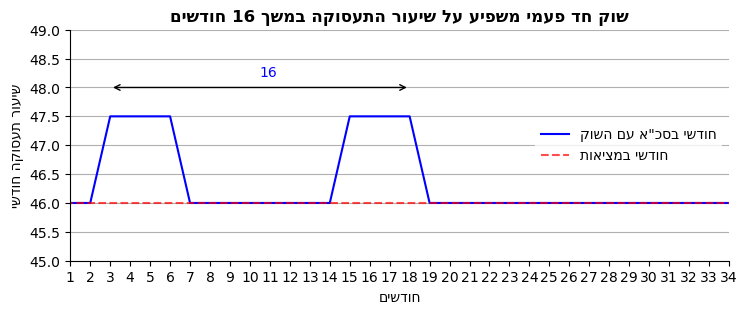

In [6]:
x = range(-10, 84)

y_mean = mean_4_8_4(y_base_a * (1 - group_b_rates) + y_base_b * group_b_rates).dropna()
y_real = [employment_real] * len(y_mean)
y_mean.index = y_mean.index - 25
fig, ax = plt.subplots(figsize=(8.5, 3))

ax.plot(x, y_mean, **d_mean, label=get_display('חודשי בסכ"א עם השוק'))
ax.plot(x, y_real, **d_real, label=get_display('חודשי במציאות'), alpha=0.7)

ax.set_xticks(x)
plt.legend(loc='center right', ncol=1, edgecolor='none')
ax.set_ylabel(get_display("שיעור תעסוקה חודשי"))
ax.set_xlabel(get_display("חודשים"))
ax.set_title(get_display("שוק חד פעמי משפיע על שיעור התעסוקה במשך 16 חודשים"), fontweight="bold")
ax.set_ylim(45, 49)
ax.set_xlim(1, 34)
plt.grid(axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate("",
            xy=(3, 48), xycoords='data',
            xytext=(18, 48), textcoords='data',
            arrowprops=dict(arrowstyle="<->"), color='b')

ax.annotate(16, xy=(10.5, 48.2), xycoords='data', color='b')

plt.show()

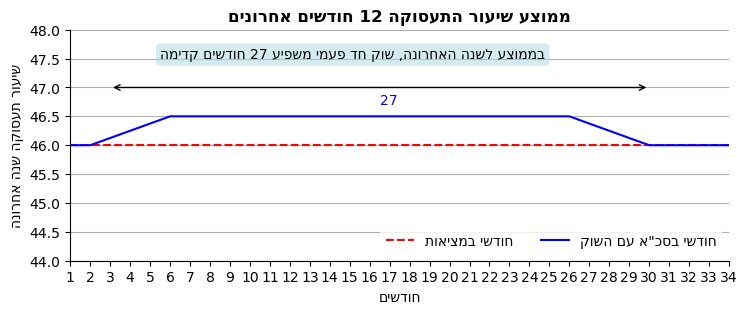

In [7]:
x = range(1, 84)
y_roll_12 = y_mean.rolling(12).mean().dropna()
fig, ax = plt.subplots(figsize=(8.5, 3))

ax.plot(x, y_real[11:], **d_real, label=get_display('חודשי במציאות'))
ax.plot(x, y_roll_12, **d_mean, label=get_display('חודשי בסכ"א עם השוק'))
ax.set_xticks(x)
plt.legend(loc='lower right', ncol=2, edgecolor='none')
ax.set_ylabel(get_display("שיעור תעסוקה שנה אחרונה"))
ax.set_xlabel(get_display("חודשים"))
ax.set_title(get_display("ממוצע שיעור התעסוקה 12 חודשים אחרונים"), fontweight="bold")
ax.set_ylim(44, 48)
ax.set_xlim(1, 34)
plt.grid(axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate("",
            xy=(3, 47), xycoords='data',
            xytext=(30, 47), textcoords='data',
            arrowprops=dict(arrowstyle="<->"), color='b')

ax.annotate(27, xy=(16.5, 46.7), xycoords='data', color='b')
text = get_display("בממוצע לשנה האחרונה, שוק חד פעמי משפיע 27 חודשים קדימה")
bbox = dict(boxstyle="round", fc="lightblue", ec='None', alpha=0.5)
ax.annotate(text, xy=(5.5, 47.5), xycoords='data', bbox=bbox)

plt.show()